# Covid-19 Exploratory Data Analysis

## Imports



In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import streamlit as st
import time 
st.title("Covid-19 Exploratory Data Analysis")

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [8]:

@st.cache
def load_data(nrows):
    data = pd.read_csv("C:/Users/vinam/Downloads/Latest Covid-19 India Status.csv")
    return data


In [43]:
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7566,6,7431,129,0.08,98.22,1.70
1,Andhra Pradesh,2014116,14693,1985566,13857,0.73,98.58,0.69
2,Arunachal Pradesh,53031,863,51908,260,1.63,97.88,0.49
3,Assam,589426,6901,576865,5660,1.17,97.87,0.96
4,Bihar,725708,100,715955,9653,0.01,98.66,1.33


In [44]:
df.shape

(36, 8)

In [45]:
df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,9.114124e+05,10505.027778,8.887123e+05,12195.000000,1.255278,97.478611,1.266111
std,1.334291e+06,37159.139184,1.290595e+06,23546.148094,2.661486,2.556711,0.563541
min,7.566000e+03,4.000000,7.431000e+03,4.000000,0.010000,84.600000,0.040000
25%,7.315325e+04,145.000000,7.021225e+04,809.750000,0.047500,97.632500,0.955000
50%,4.686465e+05,839.000000,4.597350e+05,5396.000000,0.535000,98.225000,1.300000
75%,1.005276e+06,6034.500000,9.911718e+05,13630.500000,0.945000,98.652500,1.590000
max,6.464876e+06,219441.000000,6.272800e+06,137313.000000,15.030000,99.920000,2.740000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


#### The dataset has no null values.

### We will dive straight into EDA

##### What is total count of Total states and union terotories?

In [47]:
df["State/UTs"].count()

36

#### We have the data of all 28 states and 8 union tertories

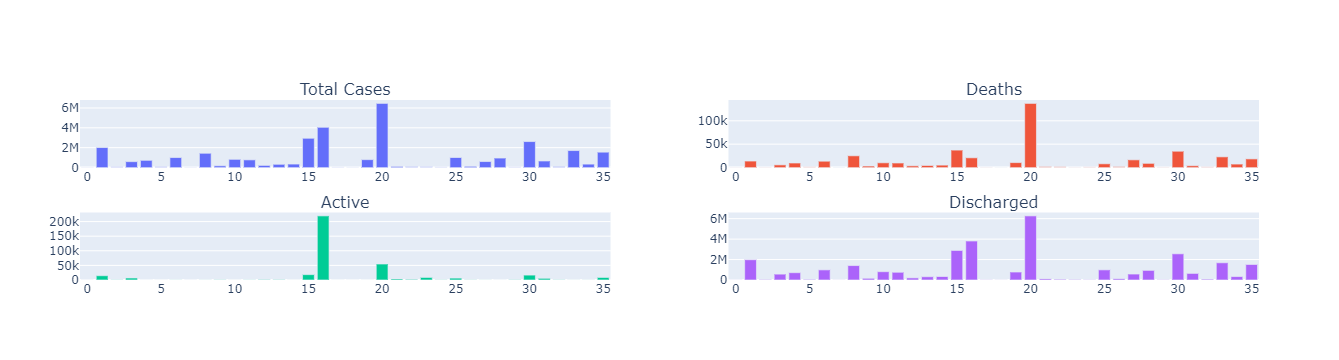

In [48]:
fig = make_subplots(rows=2, cols=2, subplot_titles=['Total Cases', 'Deaths', 'Active', 'Discharged'])

total_cases = go.Bar(y=df['Total Cases'], name='Total Cases', hovertext=df['State/UTs'])
deaths = go.Bar(y=df['Deaths'], name='Deaths', hovertext=df['State/UTs'])
active = go.Bar(y=df['Active'], name='Active', hovertext=df['State/UTs'])
discharged = go.Bar(y=df['Discharged'], name='Discharged', hovertext=df['State/UTs'])

fig.add_trace(total_cases, 1, 1)
fig.add_trace(deaths, 1, 2)
fig.add_trace(active, 2, 1)
fig.add_trace(discharged, 2, 2)

fig.update_layout(showlegend=False)
fig.show()

##### How are the trend of total cases looking in all over India?

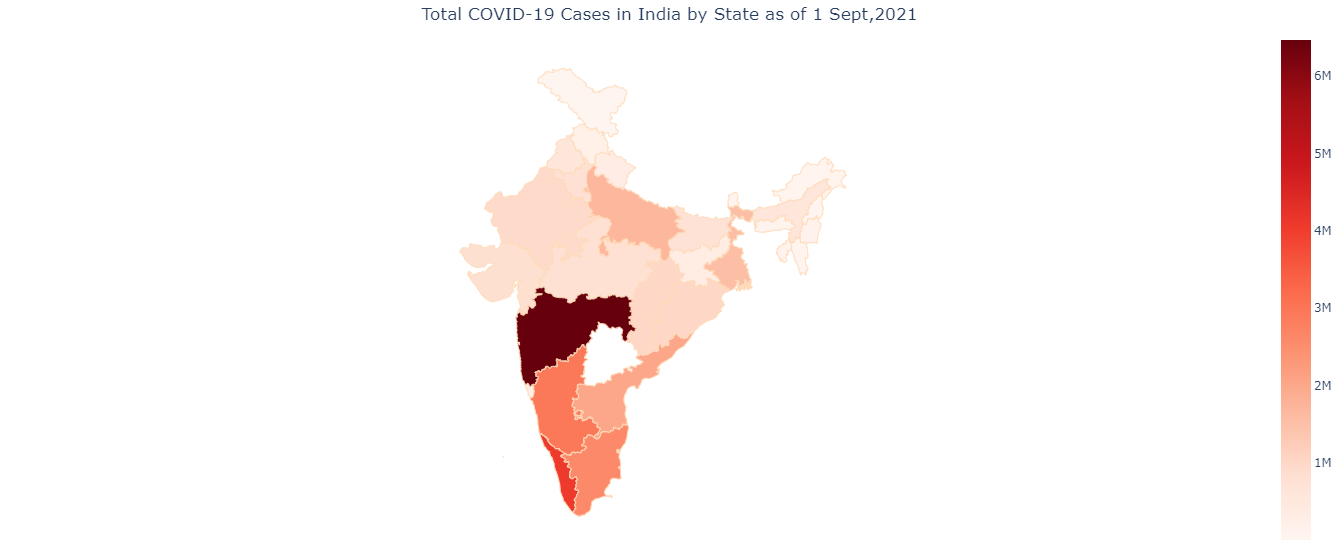

In [72]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=df['State/UTs'],
    z=df['Total Cases'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="Total COVID-19 Cases in India by State as of 1 Sept,2021 ",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

##### Maharashtra has total cases of more than 6 million cases followed by Kerala with 4 million cases and Karnataka with almost 3 million cases and at last Tamil Nadu with 2.6M cases 

#### What are the active cases in each state all over India?

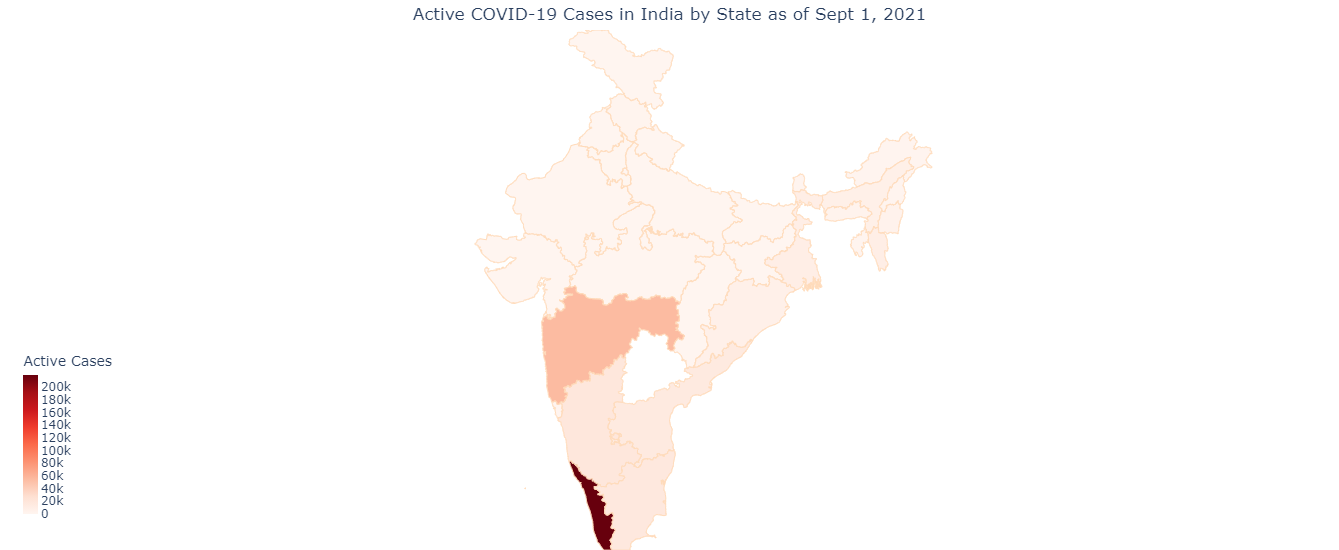

In [71]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=df['State/UTs'],
    z=df['Active'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Active Cases"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=0,
        dtick=20000,

        xanchor='left',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="Active COVID-19 Cases in India by State as of Sept 1, 2021",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

#### As of now September Kerala has the highest number of active cases. Maharashtra has around 50K active cases. In other States and UTs active cases are zero to around 15K.

### How many people have been discharged all over India?

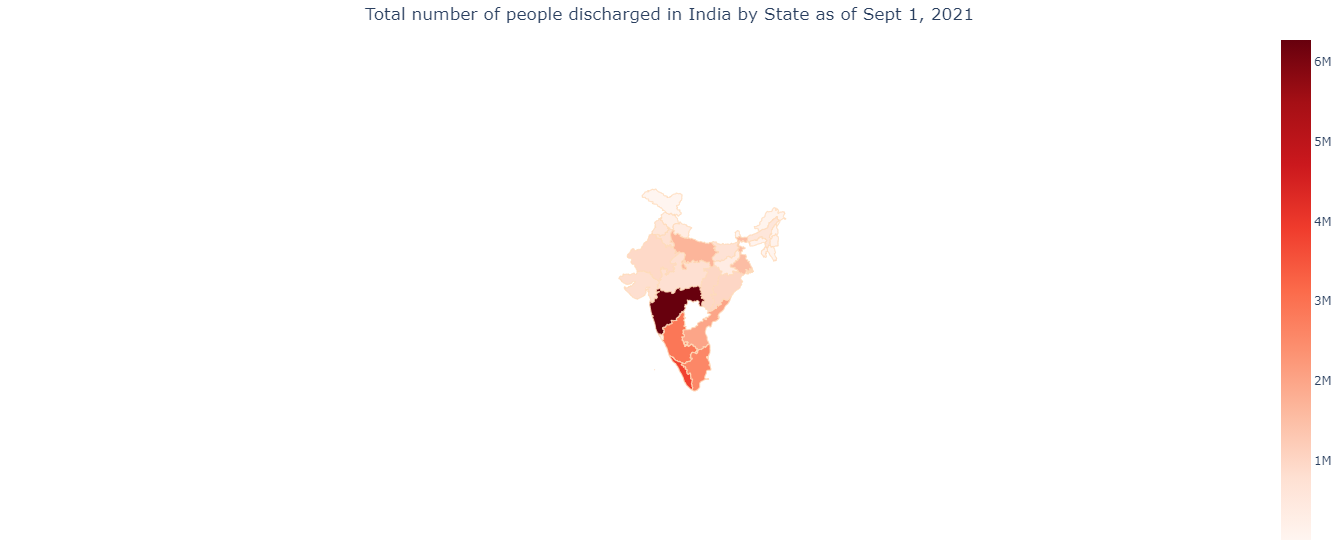

In [73]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=df['State/UTs'],
    z=df['Discharged'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="Total number of people discharged in India by State as of Sept 1, 2021",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

#### Most of the people have been discharged from Maharashtra which has the highest Total cases. Kerala with 3.8 million discharged and Karnataka & Tamil Nadu with 2.5 million discharged

### What is count of death cases in each state in India?

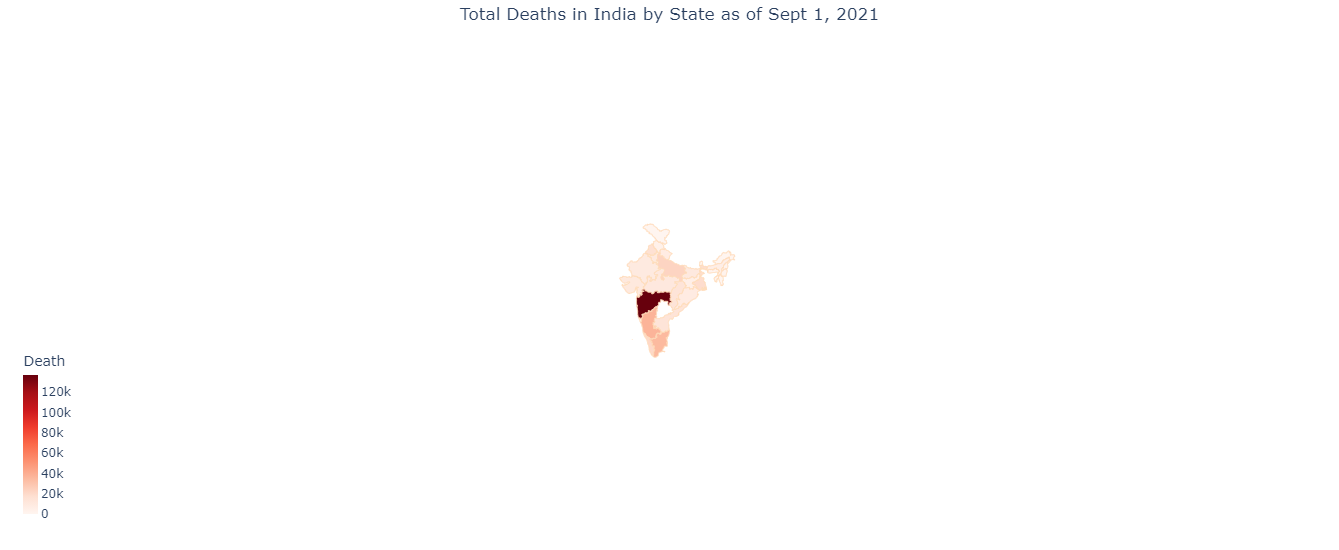

In [52]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=df['State/UTs'],
    z=df['Deaths'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Death"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=0,
        dtick=20000,

        xanchor='left',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="Total Deaths in India by State as of Sept 1, 2021",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

#### The deaths in India is far less from total cases. With Maharashtra having highest number of death.

#### What is active ratio in all states?

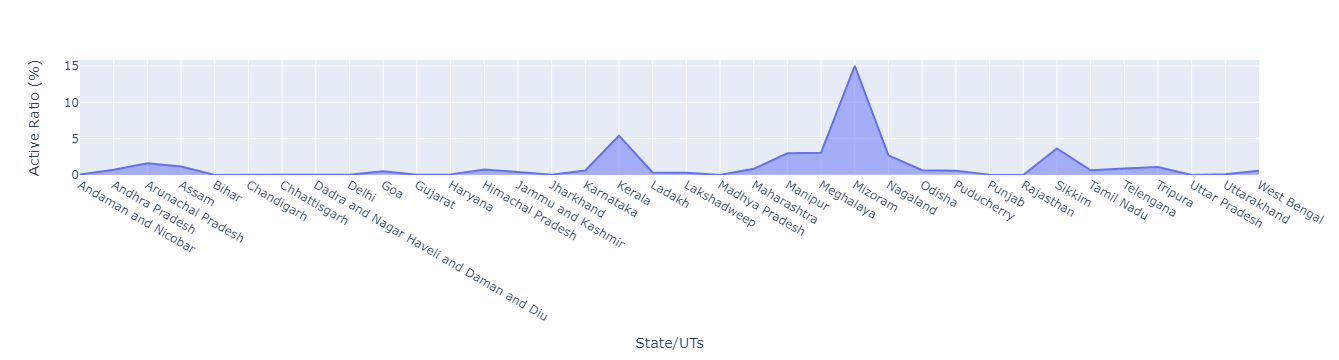

In [53]:
px.area(x="State/UTs",y="Active Ratio (%)",data_frame=df)

#### There is sudden rise of cases in northeast and corresponding regions. 

#### What is the discharge  ratio in different State?

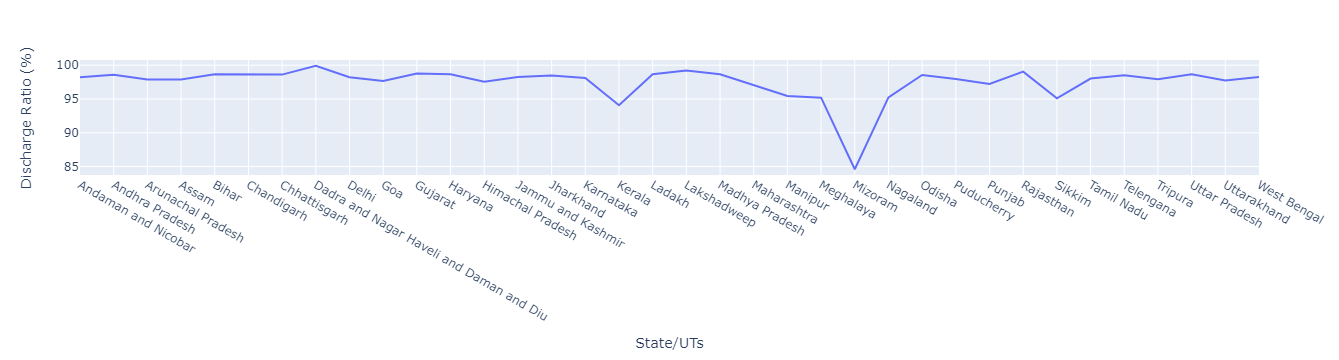

In [54]:
px.line(x="State/UTs",y="Discharge Ratio (%)",data_frame=df)

##### With sudden rise of cases in Mizoram and northeast the discharge ratio has dropped to 85% with all the other states having a discharge ratio of more than 95%

#### What is the death ratio in India?

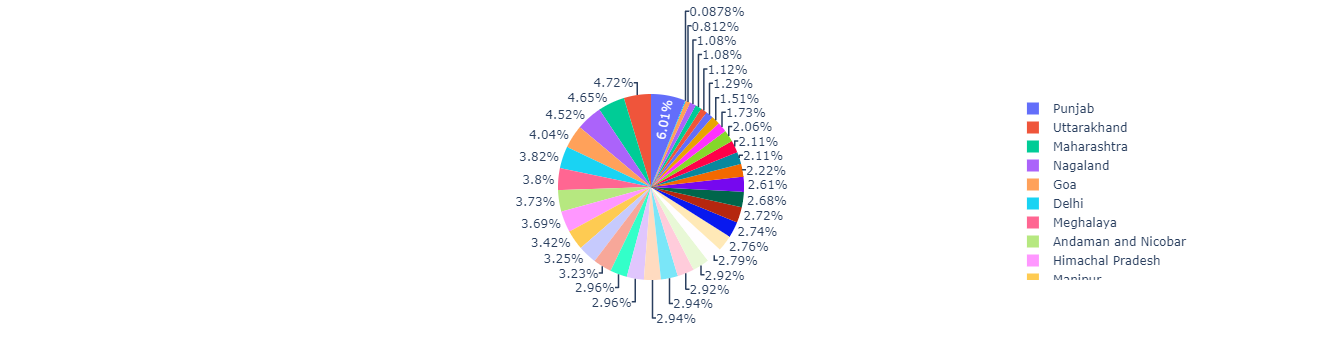

In [55]:
px.pie(names="State/UTs",values="Death Ratio (%)",data_frame=df)

#### Punjab has the highest death ratio in the country followed by Uttarakhand, Maharashtra, Nagaland, Goa

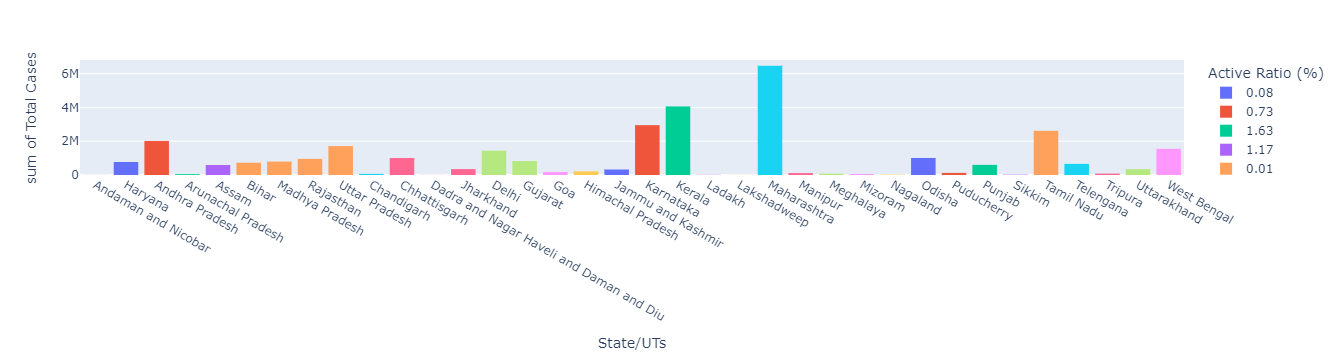

In [56]:
px.histogram(data_frame=df,x="State/UTs",y="Total Cases",color="Active Ratio (%)")

#### Maharashtra,Kerala,Karnataka,Tamil Nadu. These are the top 5 states which are contributing more cases everyday. 


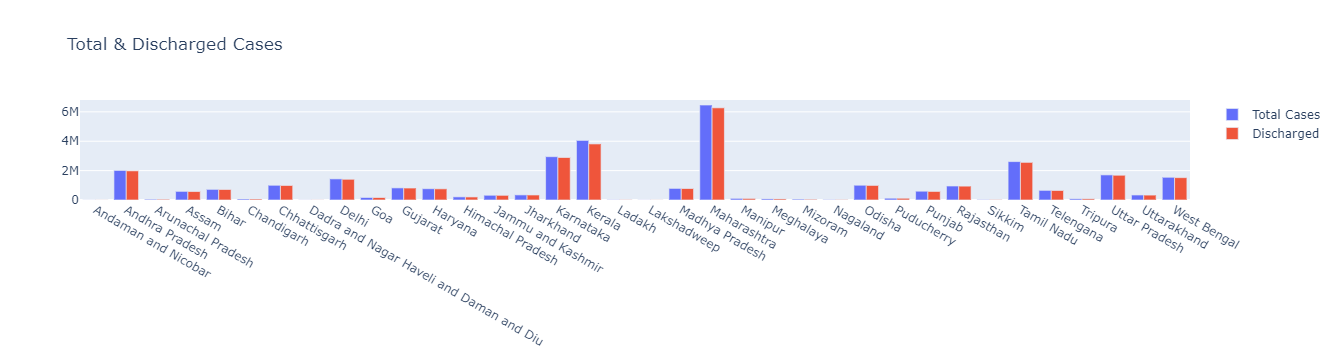

In [57]:
fig = go.Figure([go.Bar(y=df['Total Cases'], name='Total Cases', hovertext=df['State/UTs'], x=df['State/UTs']),
                 go.Bar(y=df['Discharged'], name='Discharged', hovertext=df['State/UTs'], x=df['State/UTs'])])
fig.update_layout(barmode='group')
fig.update_layout(title='Total & Discharged Cases')
fig.show()

## Model building

In [59]:
X = df['Total Cases'].to_numpy()
y = df['Deaths'].to_numpy()

X.shape, y.shape

((36,), (36,))

#### Reshaping the X-axis column so that we can make it multiple regression.

In [60]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X.reshape((len(X), 1)), y)
(model.intercept_, model.coef_[0])

(-2281.0086055152096, 0.015883050552295972)

In [61]:
model.score(X.reshape((len(X), 1)), y)

0.8100823779946547

#### The deaths are increasing the in the square of correalation of death. 

In [62]:
0.907023**2

0.822690722529

In [63]:
predictions = model.predict(X.reshape((len(X), 1)))
predictions.shape

(36,)

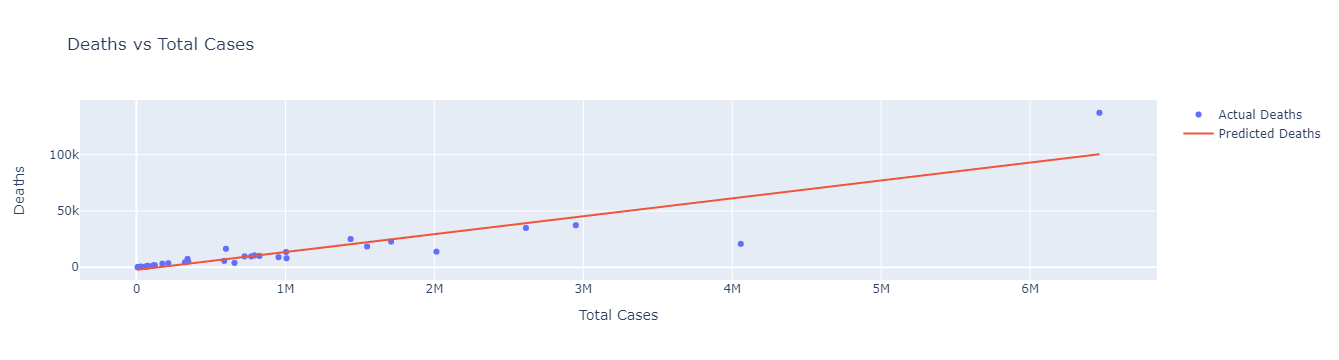

In [65]:
fig = go.Figure([go.Scatter(x=df['Total Cases'], y=df['Deaths'], mode='markers', text=df['State/UTs'], name='Actual Deaths'),
                 go.Scatter(x=df['Total Cases'], y=predictions, name='Predicted Deaths')])
fig.update_layout(title='Deaths vs Total Cases', xaxis_title='Total Cases', yaxis_title='Deaths')
fig.show()

In [5]:
progress_bar = st.sidebar.progress(0)
status_text = st.sidebar.empty()
last_rows = np.random.randn(1, 1)
chart = st.line_chart(last_rows)

for i in range(1, 101):
    new_rows = last_rows[-1, :] + np.random.randn(5, 1).cumsum(axis=0)
    status_text.text("%i%% Complete" % i)
    chart.add_rows(new_rows)
    progress_bar.progress(i)
    last_rows = new_rows
    time.sleep(0.05)

progress_bar.empty()

DeltaGenerator(_root_container=1, _provided_cursor=None, _parent=DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None), _block_type=None, _form_data=None)